In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-sales-data/Auto Sales data.csv


This dataset provides sales data from an automobile company, including details on orders, products, and customers. It includes information on order quantities, pricing, sales totals, and order statuses, as well as customer demographics and product categories.

For exploratory data analysis (EDA), I will examine trends and patterns in sales, analyze customer purchasing behaviors, and assess the impact of various factors on sales performance. The EDA will involve exploring order frequencies, sales distributions, and customer activity to gain insights that could inform business strategies and improve decision-making and much morw so let's begin.

In [2]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


# Understanding the Dataset

In [3]:
import numpy as np                # For numerical operations
import pandas as pd               # For data manipulation and analysis
import matplotlib.pyplot as plt   # For creating static, interactive, and animated visualizations
import seaborn as sns             # For statistical data visualization
import plotly.express as px       # For interactive plots
import scipy.stats as stats
import squarify
import plotly.graph_objects as go
from joypy import joyplot
import networkx as nx
import geopandas as gpd
from wordcloud import WordCloud
import warnings                   # For handling warnings
warnings.filterwarnings('ignore') # To ignore warnings (if needed)

# Define the path to the dataset
file_path = '/kaggle/input/auto-sales-data/Auto Sales data.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

In [4]:
data.head() #View the First Few Rows
# Other options
# data.tail() : Returns the last n rows of the DataFrame.
# data.sample(n) : Returns a random sample of n rows from the DataFrame.

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [5]:
data.shape

(2747, 20)

In [6]:
data.columns # Returns the column labels of the DataFrame.

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
data.index # Returns the index (row labels) of the DataFrame.

RangeIndex(start=0, stop=2747, step=1)

In [8]:
data.info()
# Other options
# data.dtypes : Check Data Types
# data.isnull().sum() : Check for Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

# Descriptive Statistics

In [9]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object'])

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      DAYS_SINCE_LASTORDER  MSRP  
0                      828    95  
1         

In [10]:
numerical_columns.describe().T # Summary Statistics for numerical columns

count          mean          std       min        25%  \
ORDERNUMBER           2747.0  10259.761558    91.877521  10100.00  10181.000   
QUANTITYORDERED       2747.0     35.103021     9.762135      6.00     27.000   
PRICEEACH             2747.0    101.098952    42.042549     26.88     68.745   
ORDERLINENUMBER       2747.0      6.491081     4.230544      1.00      3.000   
SALES                 2747.0   3553.047583  1838.953901    482.13   2204.350   
DAYS_SINCE_LASTORDER  2747.0   1757.085912   819.280576     42.00   1077.000   
MSRP                  2747.0    100.691664    40.114802     33.00     68.000   

                           50%        75%       max  
ORDERNUMBER           10264.00  10334.500  10425.00  
QUANTITYORDERED          35.00     43.000     97.00  
PRICEEACH                95.55    127.100    252.87  
ORDERLINENUMBER           6.00      9.000     18.00  
SALES                  3184.80   4503.095  14082.80  
DAYS_SINCE_LASTORDER   1761.00   2436.500   3562.00  
MSRP                     99.00    124.000    214.00

In [11]:
categorical_columns.describe().T # Summary Statistics for categorical columns
# count: Number of non-null entries.
# unique: Number of unique categories.
# top: Most frequent category.
# freq: Frequency of the most frequent category.

count unique                    top  freq
ORDERDATE         2747    246             14/11/2018    38
STATUS            2747      6                Shipped  2541
PRODUCTLINE       2747      7           Classic Cars   949
PRODUCTCODE       2747    109               S18_3232    51
CUSTOMERNAME      2747     89  Euro Shopping Channel   259
PHONE             2747     88         (91) 555 94 44   259
ADDRESSLINE1      2747     89     C/ Moralzarzal, 86   259
CITY              2747     71                 Madrid   304
POSTALCODE        2747     73                  28034   259
COUNTRY           2747     19                    USA   928
CONTACTLASTNAME   2747     76                 Freyre   259
CONTACTFIRSTNAME  2747     72                  Diego   259
DEALSIZE          2747      3                 Medium  1349

In [12]:
data['STATUS'].value_counts() #Value Counts for Categorical Variables

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [13]:
# Skewness and Kurtosis:

# Define thresholds for categorization
def categorize_skewness(value):
    if value > 1:
        category = 'High'
    elif value > 0.5:
        category = 'Moderate'
    else:
        category = 'Less'
    
    direction = 'Right Skewed' if value > 0 else 'Left Skewed'
    return f'{category} {direction}'

def categorize_kurtosis(value):
    if value > 3:
        return 'High'
    elif value > 1:
        return 'Moderate'
    else:
        return 'Less'

# Calculate skewness and kurtosis
skewness = numerical_columns.skew()  # Skewness
kurtosis = numerical_columns.kurt()  # Kurtosis

# Apply categorization functions
skewness_categories = skewness.apply(categorize_skewness)
kurtosis_categories = kurtosis.apply(categorize_kurtosis)

# Print results with categories
print("Skewness:")
print(pd.DataFrame({'Skewness': skewness, 'Category': skewness_categories}))

print("\nKurtosis:")
print(pd.DataFrame({'Kurtosis': kurtosis, 'Category': kurtosis_categories}))


#Other option
# skewness = numerical_columns.skew() #Skewness
# kurtosis = numerical_columns.kurt() #Kurtosis
# print("Skewness:")
# print(skewness)
# print("\nKurtosis:")
# print(kurtosis)

Skewness:
                      Skewness               Category
ORDERNUMBER          -0.006995       Less Left Skewed
QUANTITYORDERED       0.369286      Less Right Skewed
PRICEEACH             0.697222  Moderate Right Skewed
ORDERLINENUMBER       0.575327  Moderate Right Skewed
SALES                 1.155940      High Right Skewed
DAYS_SINCE_LASTORDER -0.002983       Less Left Skewed
MSRP                  0.575646  Moderate Right Skewed

Kurtosis:
                      Kurtosis  Category
ORDERNUMBER          -1.154407      Less
QUANTITYORDERED       0.442865      Less
PRICEEACH             0.228519      Less
ORDERLINENUMBER      -0.591036      Less
SALES                 1.773100  Moderate
DAYS_SINCE_LASTORDER -1.024466      Less
MSRP                 -0.139490      Less


In [14]:
# Correlation Matrix:
correlation_matrix = numerical_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  \
ORDERNUMBER              1.000000         0.067110  -0.003369   
QUANTITYORDERED          0.067110         1.000000   0.010161   
PRICEEACH               -0.003369         0.010161   1.000000   
ORDERLINENUMBER         -0.054300        -0.016295  -0.052646   
SALES                    0.037289         0.553359   0.808287   
DAYS_SINCE_LASTORDER    -0.251476        -0.021923  -0.397091   
MSRP                    -0.013910         0.020551   0.778393   

                      ORDERLINENUMBER     SALES  DAYS_SINCE_LASTORDER  \
ORDERNUMBER                 -0.054300  0.037289             -0.251476   
QUANTITYORDERED             -0.016295  0.553359             -0.021923   
PRICEEACH                   -0.052646  0.808287             -0.397091   
ORDERLINENUMBER              1.000000 -0.057414              0.046615   
SALES                       -0.057414  1.000000             -0.334274   
DAYS_SINCE_LASTORDER 

# Data Cleaning

#### Treating missing values

In [15]:
# Filling missing values depends on the nature of the column and the context of the dataset.

# For Numerical Columns

# Mean Imputation
# data['QUANTITYORDERED'].fillna(data['QUANTITYORDERED'].mean(), inplace=True) 

# Median Imputation
# data['QUANTITYORDERED'].fillna(data['QUANTITYORDERED'].median(), inplace=True)

# Predictive Imputation: Use a machine learning model to predict missing values based on other features.
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# data[['QUANTITYORDERED']] = imputer.fit_transform(data[['QUANTITYORDERED']])

# Interpolation
# data['QUANTITYORDERED'].interpolate(method='linear', inplace=True)

# Domain knowledge
# Check with a domain expert to fill the missing values

# For Categorical Columns

# Mode Imputation
# data['PRODUCTLINE'].fillna(data['PRODUCTLINE'].mode()[0], inplace=True)

# Forward Fill / Backward Fill (Useful in time series data)
# data['PRODUCTLINE'].fillna(method='ffill', inplace=True)  # Forward fill
# data['PRODUCTLINE'].fillna(method='bfill', inplace=True)  # Backward fill

# Predictive Imputation : Use a machine learning model to predict the missing values based on other features.
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# data[['PRODUCTLINE']] = imputer.fit_transform(data[['PRODUCTLINE']])

# Group-Based Imputation: If there are groups or clusters within the data, you can impute missing values within each group.
# data['PRODUCTLINE'] = data.groupby('ANOTHER_COLUMN')['PRODUCTLINE'].transform(lambda x: x.fillna(x.mode()[0]))

#### Treating duplicated values

In [16]:
# Removing duplicates

# Remove Duplicates Across All Columns
# data = data.drop_duplicates()

# Remove Duplicates Based on Specific Columns
# data = data.drop_duplicates(subset=['column1', 'column2'])


# Identifying duplicates

# Find Duplicates Across All Columns
# duplicates = data[data.duplicated()]

# Find Duplicates Based on Specific Columns
# duplicates = data[data.duplicated(subset=['column1', 'column2'])]


# Keep the specific occurrence of duplicates

# Keep First Occurrence (default)
# data = data.drop_duplicates(keep='first')

# Keep Last Occurrence
# data = data.drop_duplicates(keep='last')


# Handling Duplicates in a Grouped Context : Suppose you have a DataFrame with sales data for different salespeople, and you want to remove duplicates within each salesperson's records.

# data = data.groupby('group_column').apply(lambda x: x.drop_duplicates())


# Removing Duplicates with a Threshold : fuzzywuzzy helps find similar company names and remove duplicates based on a similarity threshold of i.e 90 it is used for categorical columns

# When you want to remove duplicates based on a similarity threshold rather than exact matches, you might use libraries like fuzzywuzzy for fuzzy string matching or recordlinkage for more advanced techniques.
# Using Numeric Thresholds: We might want to identify and handle numerical values that are close to each other but not exactly the same. For instance, when dealing with measurements or scores where a small difference is considered negligible.

#### Treating outliers

In [17]:
# Statistical Methods

# Z-Score Method
# from scipy import stats
# data['z_score'] = stats.zscore(data['QUANTITYORDERED'])
# data_cleaned = data[abs(data['z_score']) < 3]

# Modified Z-Score Method
# from statsmodels import robust
# median = data['QUANTITYORDERED'].median()
# mad = robust.mad(data['QUANTITYORDERED'])
# modified_z_score = 0.6745 * (data['QUANTITYORDERED'] - median) / mad
# data_cleaned = data[abs(modified_z_score) < 3.5]

# Interquartile Range (IQR) Method
# Q1 = data['QUANTITYORDERED'].quantile(0.25)
# Q3 = data['QUANTITYORDERED'].quantile(0.75)
# IQR = Q3 - Q1
# data_cleaned = data[(data['QUANTITYORDERED'] >= (Q1 - 1.5 * IQR)) & (data['QUANTITYORDERED'] <= (Q3 + 1.5 * IQR))]


# Model-Based Methods
# Isolation Forest
# from sklearn.ensemble import IsolationForest
# model = IsolationForest(contamination=0.01)
# outliers = model.fit_predict(data[['QUANTITYORDERED']])
# data_cleaned = data[outliers == 1]

# Local Outlier Factor (LOF)
# from sklearn.neighbors import LocalOutlierFactor
# model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
# outliers = model.fit_predict(data[['QUANTITYORDERED']])
# data_cleaned = data[outliers == 1]


# Visualization-Based Methods

# Box Plot
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.boxplot(data['QUANTITYORDERED'])
# plt.show()

# Scatter Plot
# plt.scatter(range(len(data['QUANTITYORDERED'])), data['QUANTITYORDERED'])
# plt.show()


# Transformations

# Log Transformation
# data['log_QUANTITYORDERED'] = np.log(data['QUANTITYORDERED'] + 1)  # Adding 1 to avoid log(0)

# Winsorization : Example : Replace values below the 5th percentile with the value at the 5th percentile and values above the 95th percentile with the value at the 95th percentile.
# from scipy.stats import mstats
# data['QUANTITYORDERED'] = mstats.winsorize(data['QUANTITYORDERED'], limits=[0.05, 0.05])


# Domain-Specific Techniques
# Apply specific business logic or domain expertise to identify and treat outliers based on practical constraints or known patterns.

#### Correct Data Types

In [18]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Univariate Analysis

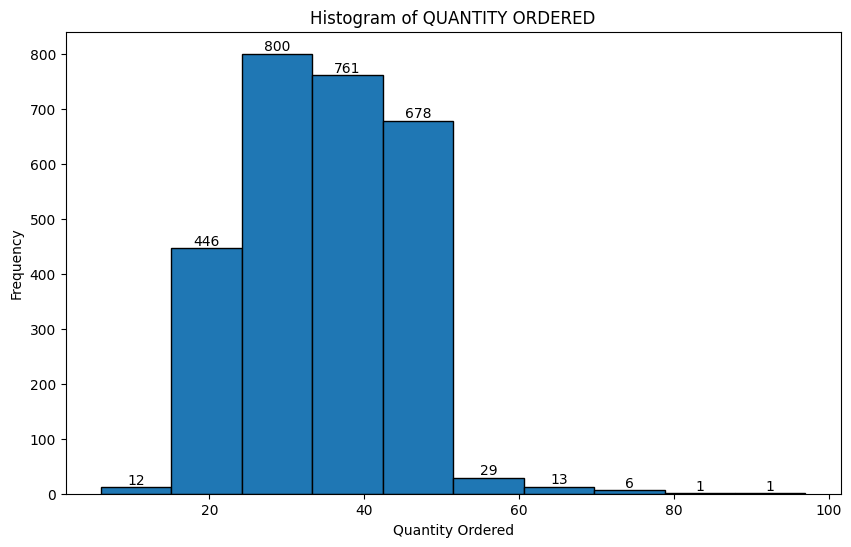

In [19]:
# Histogram

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data['QUANTITYORDERED'], bins=10, edgecolor='black')

# Add the exact values on top of each bar
for count, bin_edge in zip(counts, bins):
    height = count
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, height, int(count), ha='center', va='bottom')

plt.title('Histogram of QUANTITY ORDERED')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

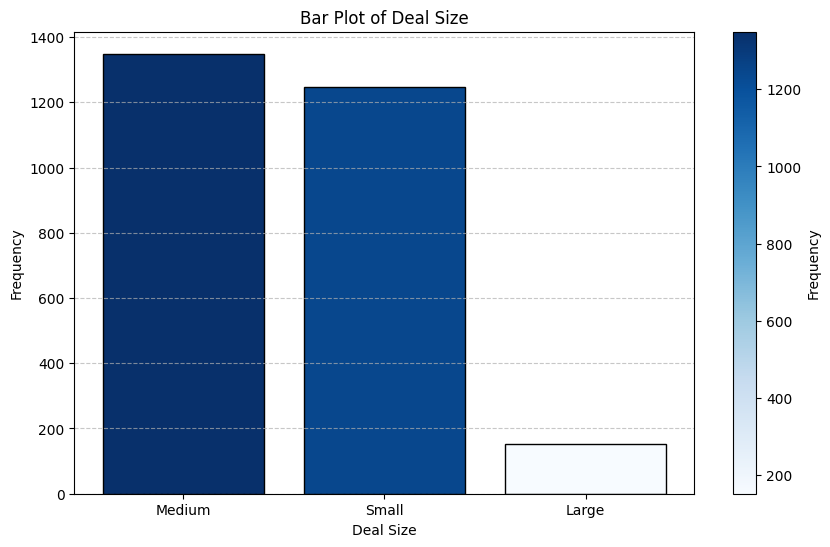

In [20]:
# Bar plot 

# Count the occurrences of each deal size and sort in descending order
deal_size_counts = data['DEALSIZE'].value_counts()
deal_size_counts = deal_size_counts.sort_values(ascending=False)

# Create a color gradient based on the value counts
norm = plt.Normalize(deal_size_counts.min(), deal_size_counts.max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Create a bar plot with color gradient
plt.figure(figsize=(10, 6))
bars = plt.bar(deal_size_counts.index, deal_size_counts.values, color=sm.to_rgba(deal_size_counts.values), edgecolor='black')

# Add color bar
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Frequency')

plt.title('Bar Plot of Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

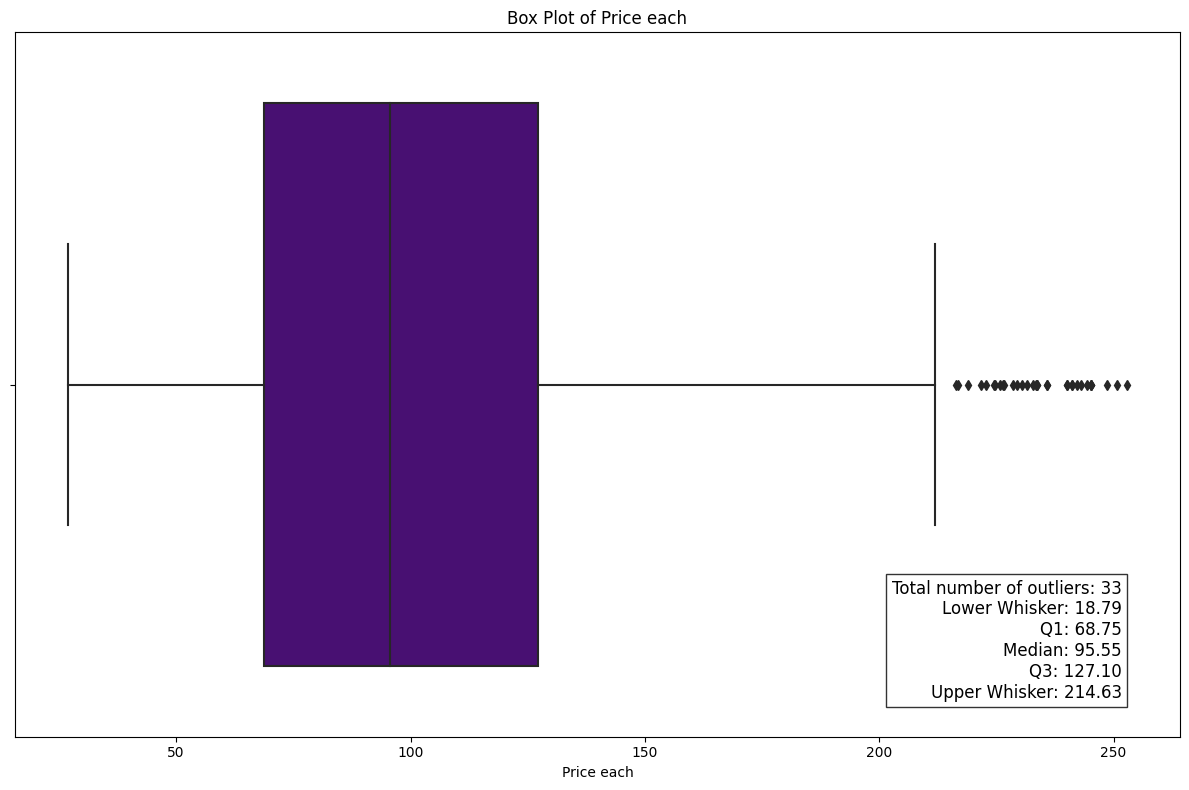

In [21]:
# Box Plot

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x=data['PRICEEACH'], color='indigo')

# Calculate whiskers and quartiles
lower_whisker = - (data['PRICEEACH'].quantile(0.25) - (1.5 * (data['PRICEEACH'].quantile(0.75) - data['PRICEEACH'].quantile(0.25))))
upper_whisker = data['PRICEEACH'].quantile(0.75) + (1.5 * (data['PRICEEACH'].quantile(0.75) - data['PRICEEACH'].quantile(0.25)))
Q1 = data['PRICEEACH'].quantile(0.25)
median = data['PRICEEACH'].median()
Q3 = data['PRICEEACH'].quantile(0.75)

# Find outliers
outliers = data[(data['PRICEEACH'] < lower_whisker) | (data['PRICEEACH'] > upper_whisker)]
num_outliers = outliers.shape[0]

# Get x and y-axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Define position for the text
text_x_position = x_max - (x_max - x_min) * 0.05  # Adjust as needed for padding from right edge
text_y_position = y_min + (y_max - y_min) * 0.05  # Adjust as needed for padding from bottom edge

# Add text for the number of outliers and the summary statistics
plt.text(text_x_position, text_y_position, 
         f'Total number of outliers: {num_outliers}\n'
         f'Lower Whisker: {lower_whisker:.2f}\n'
         f'Q1: {Q1:.2f}\n'
         f'Median: {median:.2f}\n'
         f'Q3: {Q3:.2f}\n'
         f'Upper Whisker: {upper_whisker:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', 
         color='black', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Adjust plot layout to make it tight
plt.title('Box Plot of Price each')
plt.xlabel('Price each')
plt.tight_layout()  # Adjust layout to fit elements tightly
plt.show()

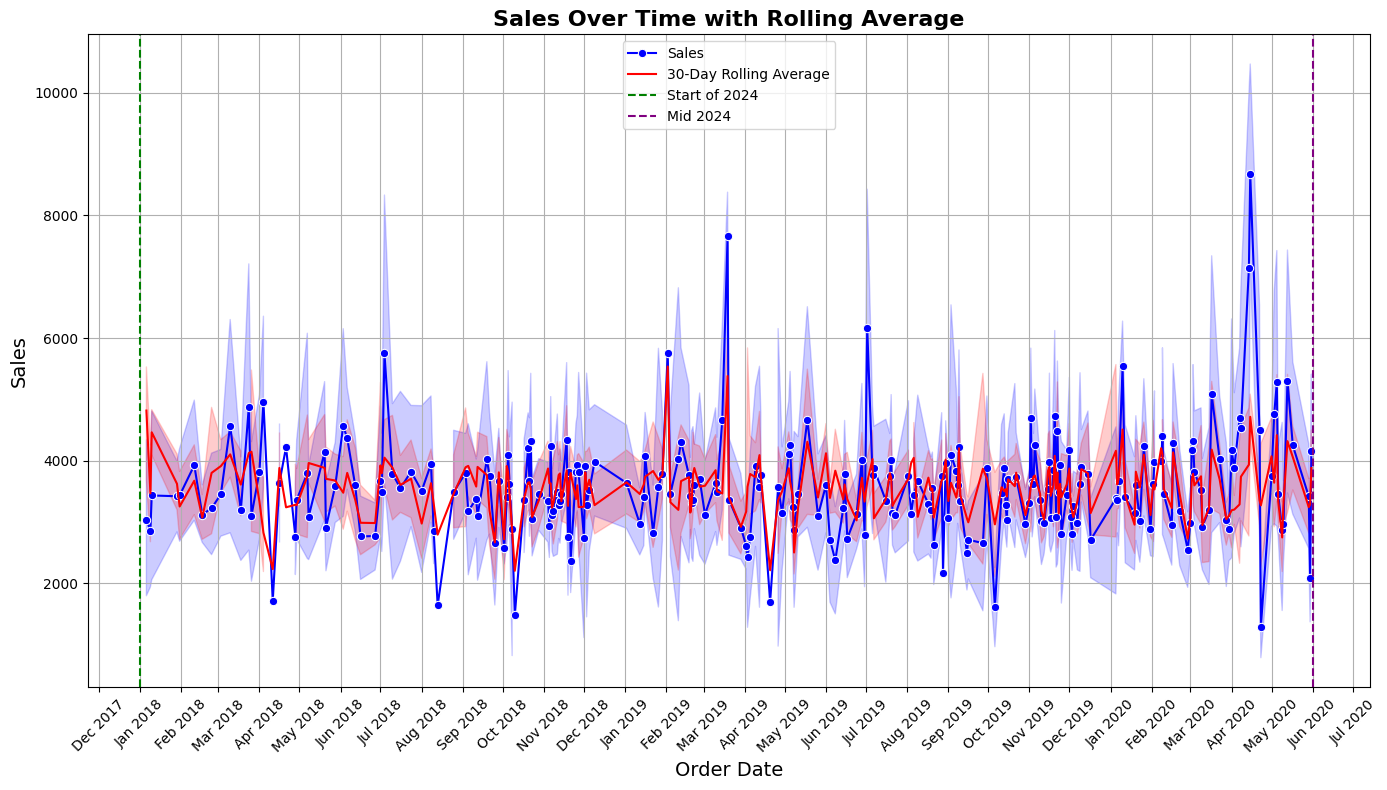

In [22]:
# Line plot

plt.figure(figsize=(14, 8))

# Plot the line for Sales
sns.lineplot(x='ORDERDATE', y='SALES', data=data, marker='o', color='b', label='Sales')

# Add a rolling average (e.g., 30-day rolling average)
data['ROLLING_AVG'] = data['SALES'].rolling(window=30).mean()
sns.lineplot(x='ORDERDATE', y='ROLLING_AVG', data=data, color='r', label='30-Day Rolling Average')

# Add titles and labels
plt.title('Sales Over Time with Rolling Average', fontsize=16, fontweight='bold')
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Add grid
plt.grid(True)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Highlight significant dates or periods
plt.axvline(pd.Timestamp('2018-01-01'), color='g', linestyle='--', label='Start of 2024')
plt.axvline(pd.Timestamp('2020-06-01'), color='purple', linestyle='--', label='Mid 2024')

# Add a legend
plt.legend()

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Adjust layout to fit labels
plt.tight_layout()

plt.show()

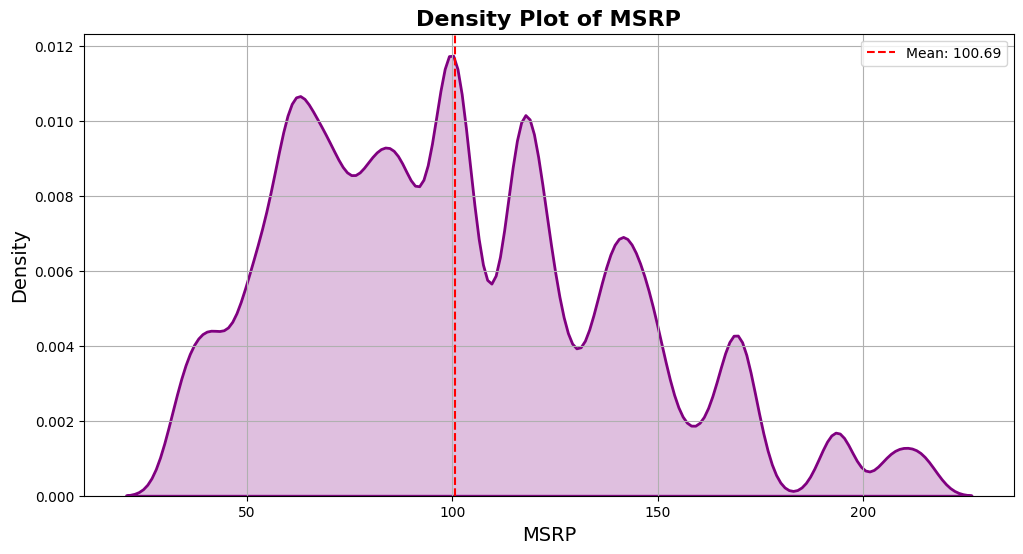

In [23]:
# Density Plot (Kernel Density Estimate)

plt.figure(figsize=(12, 6))

# Create the KDE plot with additional details
sns.kdeplot(data['MSRP'], 
            fill=True, 
            color='purple', 
            linewidth=2, 
            bw_adjust=0.5)  # Adjust bandwidth for smoothness

# Add titles and labels
plt.title('Density Plot of MSRP', fontsize=16, fontweight='bold')
plt.xlabel('MSRP', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add vertical line for mean
mean_days = data['MSRP'].mean()
plt.axvline(mean_days, color='red', linestyle='--', label=f'Mean: {mean_days:.2f}')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

plt.show()

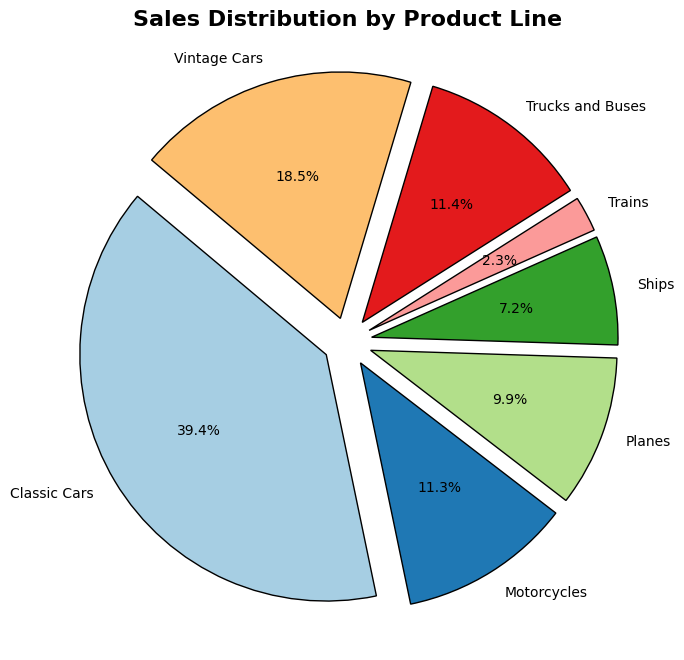

In [24]:
# Pie Chart

# Aggregate sales by product line
sales_by_product_line = data.groupby('PRODUCTLINE')['SALES'].sum()

# Create explode array to highlight the largest slice
explode = [0.1] * len(sales_by_product_line)  # Adjust as needed

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sales_by_product_line, 
        labels=sales_by_product_line.index, 
        autopct='%1.1f%%', 
        explode=explode, 
        colors=plt.cm.Paired(range(len(sales_by_product_line))),
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Sales Distribution by Product Line', fontsize=16, fontweight='bold')

plt.show()

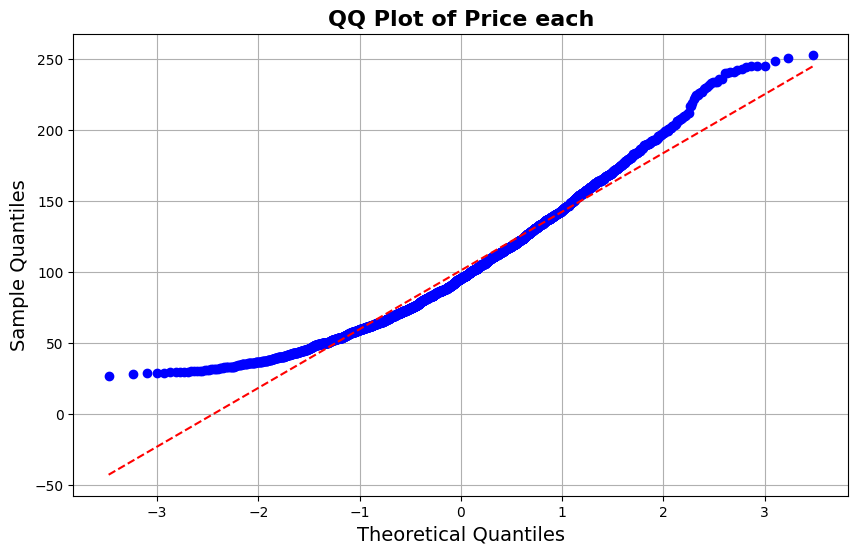

In [25]:
# QQ Plot

plt.figure(figsize=(10, 6))

# Create the QQ plot
res = stats.probplot(data['PRICEEACH'], dist="norm", plot=plt)

# Customize the reference line
line = plt.gca().get_lines()[1]  # Get the reference line
line.set_linestyle('--')
line.set_color('red')

# Add titles and labels
plt.title('QQ Plot of Price each', fontsize=16, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)

plt.grid(True)

plt.show()

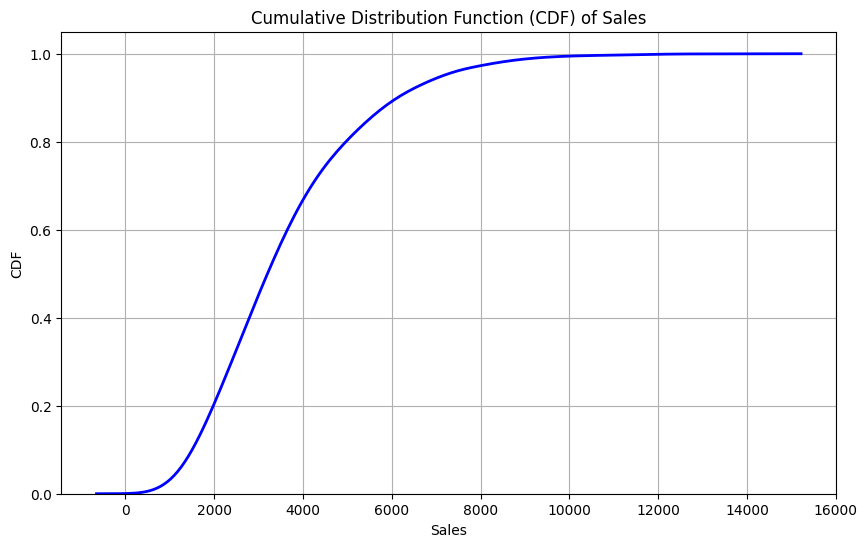

In [26]:
# Cumulative Distribution Function (CDF) Plot

# Sample data assuming your DataFrame is named 'data'
sales = data['SALES']

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sales, cumulative=True, color='blue', linestyle='-', linewidth=2)
plt.xlabel('Sales')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Sales')
plt.grid(True)
plt.show()

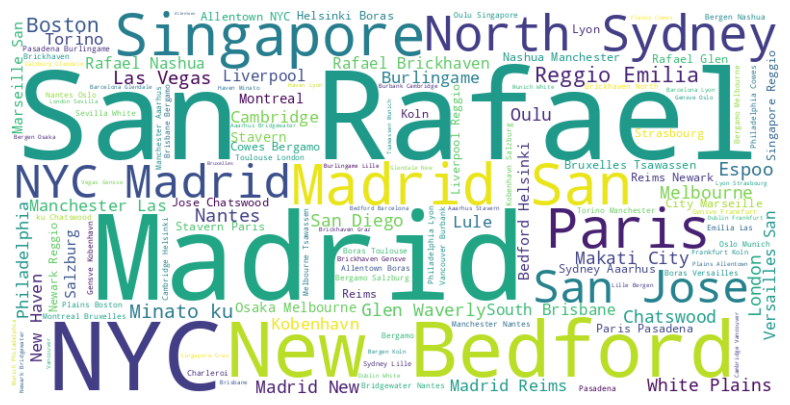

In [27]:
# Word cloud

# Concatenate all city names into a single string
text = ' '.join(data['CITY'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [28]:
# Radial plot

# Sample data aggregation
data_grouped = data.groupby('PRODUCTLINE').agg({'SALES': 'sum'}).reset_index()

# Create a radial plot
fig = go.Figure()

# Add a trace for each product line
for product_line in data_grouped['PRODUCTLINE']:
    sales = data_grouped[data_grouped['PRODUCTLINE'] == product_line]['SALES'].values[0]
    fig.add_trace(go.Scatterpolar(
        r=[sales],
        theta=[product_line],
        mode='markers',
        marker=dict(size=14),
        name=product_line
    ))

# Update layout for better readability
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, data_grouped['SALES'].max()]),
    ),
    showlegend=True
)

fig.show()

In [29]:
# Area chart

# Convert ORDERDATE to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Aggregate sales by month
data['Month'] = data['ORDERDATE'].dt.to_period('M')
monthly_sales = data.groupby('Month')['SALES'].sum().reset_index()

# Create the area chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_sales['Month'].astype(str),
    y=monthly_sales['SALES'],
    fill='tozeroy',  # Fills the area under the line
    mode='lines',
    name='Total Sales'
))

# Update layout
fig.update_layout(
    title='Total Sales Over Time',
    xaxis_title='Month',
    yaxis_title='Total Sales',
    xaxis=dict(tickangle=-45)
)

fig.show()

# Bivariate Analysis

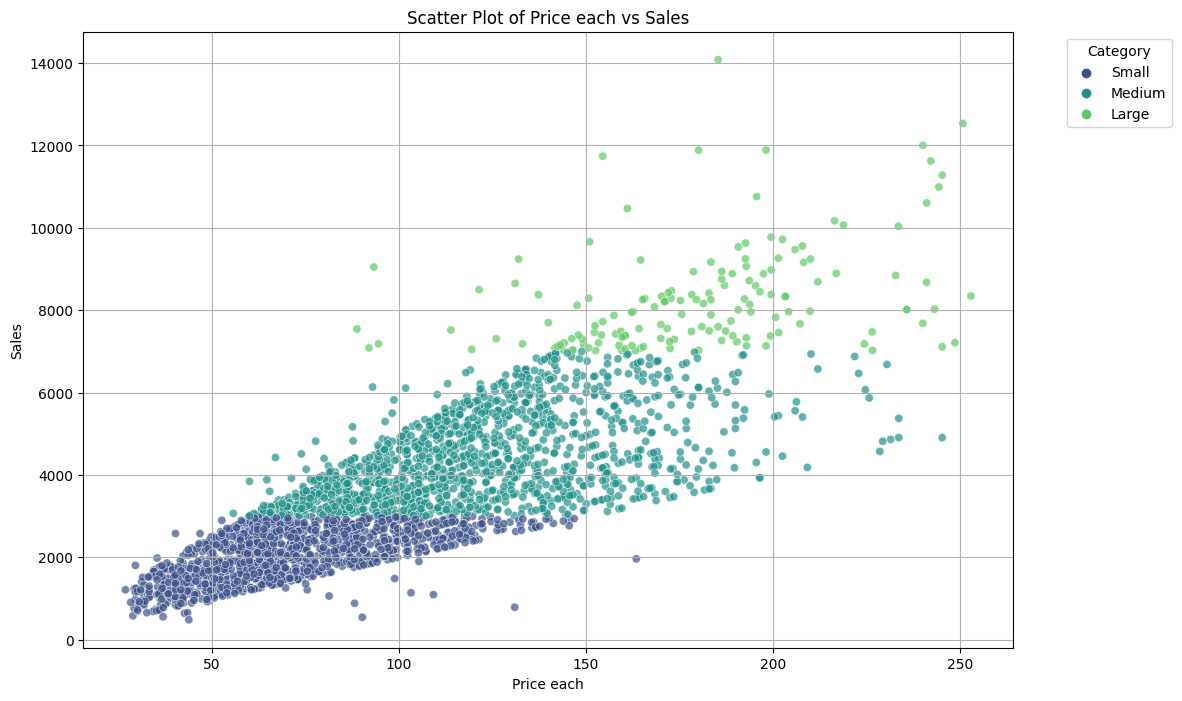

In [30]:
# Scatter plot

plt.figure(figsize=(12, 8))

# Assuming you have an additional categorical variable 'CATEGORY' and a size variable 'SIZE'
sns.scatterplot(x='PRICEEACH', y='SALES', data=data, hue='DEALSIZE', palette='viridis', sizes=(20, 200), alpha=0.7)

# Title and labels
plt.title('Scatter Plot of Price each vs Sales')
plt.xlabel('Price each')
plt.ylabel('Sales')

# Add legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(True)

plt.show()

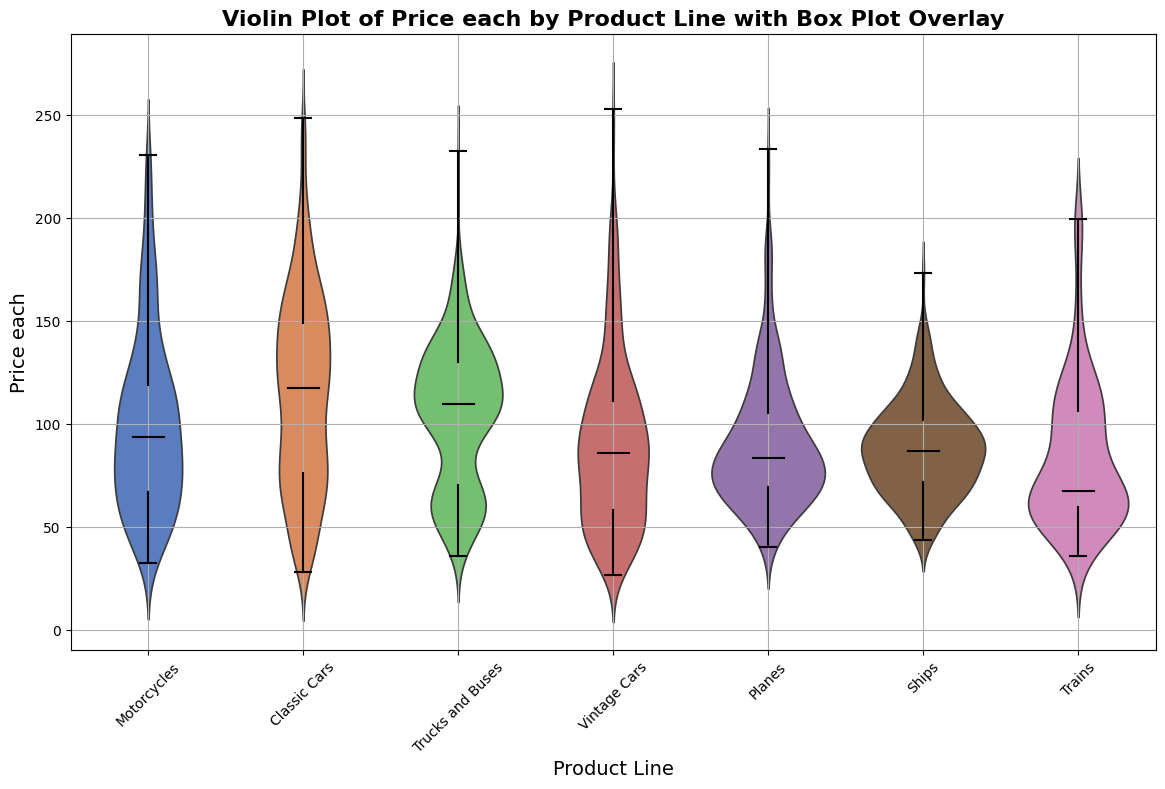

In [31]:
# Violet plot

plt.figure(figsize=(14, 8))

# Create the violin plot with additional details
sns.violinplot(x='PRODUCTLINE', y='PRICEEACH', data=data, palette='muted', inner=None, linewidth=1.25)

# Overlay with a box plot
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=data, whis=np.inf, width=0.2, color='k', fliersize=0, linewidth=1.5)

# Add titles and labels
plt.title('Violin Plot of Price each by Product Line with Box Plot Overlay', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('Price each', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

plt.show()

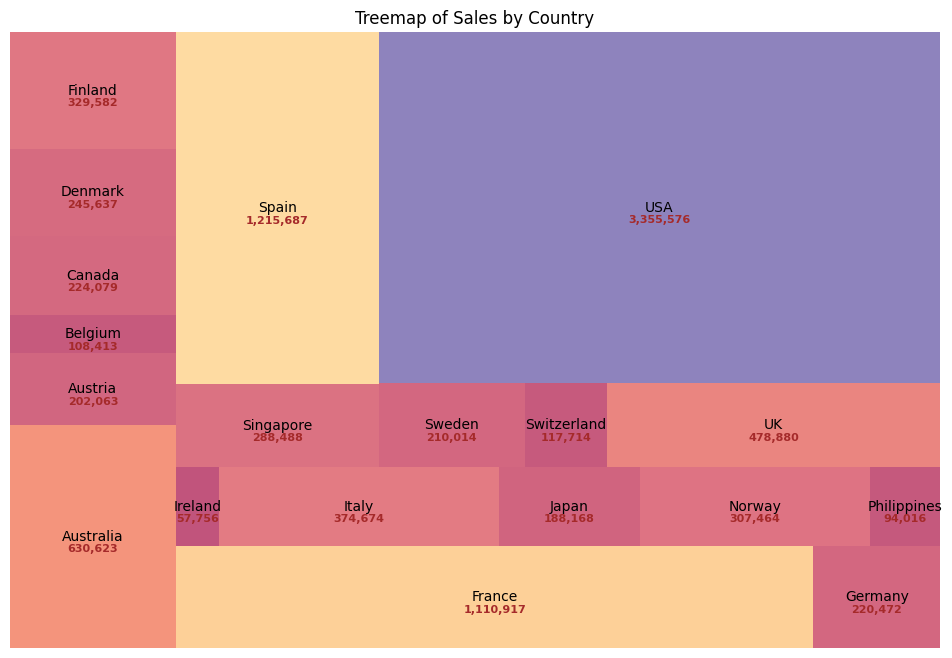

In [32]:
# Treemap

# Aggregating sales by country
treemap_data = data.groupby('COUNTRY').agg({'SALES': 'sum'}).reset_index()
sizes = treemap_data['SALES']
labels = treemap_data['COUNTRY']

# Define a colormap
cmap = plt.get_cmap('Spectral')  # You can choose any colormap from matplotlib
colors = cmap(sizes / max(sizes))  # Normalize sizes for color mapping

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=ax)

# Add annotations for total sales just below each country name
for i, (label, size) in enumerate(zip(labels, sizes)):
    # Calculate the position for text annotation
    rect = ax.patches[i]
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() / 2
    # Add total sales value just below the country name
    ax.text(x, y - 1.2, f'{size:,.0f}', ha='center', va='top', fontsize=8, color='brown', weight='bold')

plt.title('Treemap of Sales by Country')
plt.axis('off')  # Turn off the axis
plt.show()

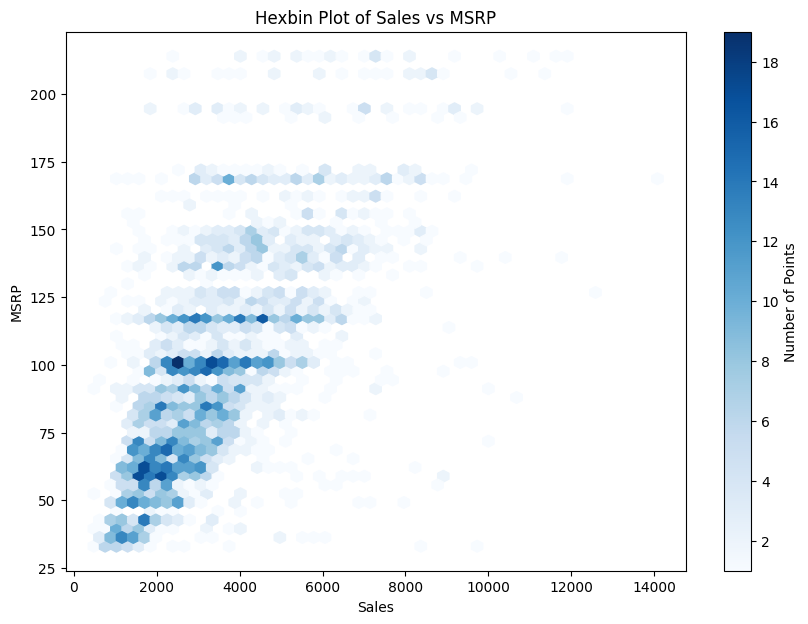

In [33]:
# Hexbin plot

# Plotting hexbin plot for SALES vs MSRP
plt.figure(figsize=(10, 7))
plt.hexbin(data['SALES'], data['MSRP'], gridsize=50, cmap='Blues', mincnt=1)

# Add color bar
plt.colorbar(label='Number of Points')

# Set labels and title
plt.xlabel('Sales')
plt.ylabel('MSRP')
plt.title('Hexbin Plot of Sales vs MSRP')

plt.show()

In [34]:
# Network graph

# Create a graph object
G = nx.Graph()

# Add edges based on country-status relationships
for _, row in data.iterrows():
    country = row['COUNTRY']
    status = row['STATUS']
    
    # Add nodes and edges to the graph
    G.add_node(country, bipartite=0)  # Country nodes
    G.add_node(status, bipartite=1)   # Status nodes
    G.add_edge(country, status)       # Edge between country and status

# Compute the position of nodes using the spring layout
pos = nx.spring_layout(G)

# Extract node and edge information
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Define node colors and sizes
node_color = ['skyblue' if G.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in G.nodes()]
node_size = [30 if G.nodes[node]['bipartite'] == 0 else 60 for node in G.nodes()]  # Adjust sizes as needed

# Create the Plotly figure
fig = go.Figure()

# Add edges to the plot
fig.add_trace(go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='gray'),
    hoverinfo='none'
))

# Add nodes to the plot
fig.add_trace(go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=[node for node in G.nodes()],  # Show text for all nodes
    textposition='top center',
    marker=dict(
        size=[size for size in node_size],
        color=node_color,
        line=dict(width=0.5, color='black')
    ),
    hoverinfo='text',
    textfont=dict(size=10)  # Adjust text size as needed
))

# Update layout
fig.update_layout(
    showlegend=False,
    title='Interactive Network Graph of Countries and Statuses',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    hovermode='closest'
)

fig.show()

<Figure size 1200x800 with 0 Axes>

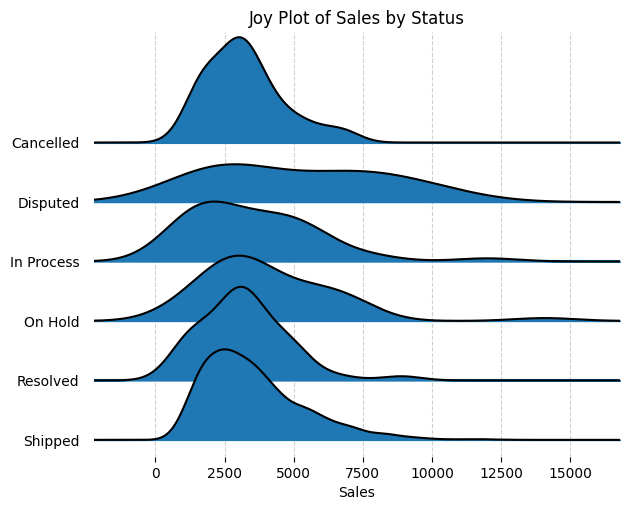

In [35]:
# Joy plot

# Prepare data for the Joy Plot
grouped_data = data.groupby('STATUS')['SALES'].apply(list).to_dict()

# Create the Joy Plot
plt.figure(figsize=(12, 8))
joyplot(data=grouped_data, labels=grouped_data.keys())
plt.title('Joy Plot of Sales by Status')
plt.xlabel('Sales')
plt.ylabel('Density')

# Customize plot appearance
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability

plt.show()

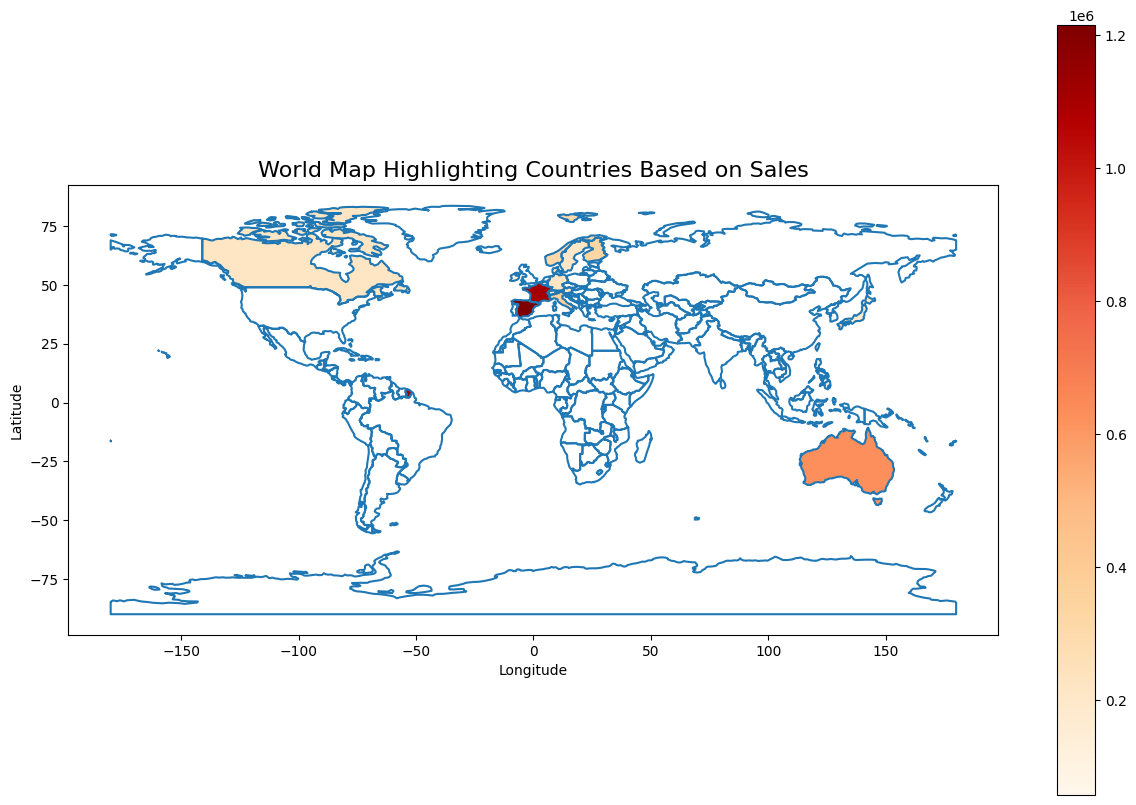

In [36]:
# Map

# Aggregate sales by country
sales_by_country = data.groupby('COUNTRY')['SALES'].sum().reset_index()

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge sales data with the world map
world = world.merge(sales_by_country, how='left', left_on='name', right_on='COUNTRY')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='SALES', ax=ax, legend=True, 
           cmap='OrRd',  # Color map for highlighting
           edgecolor='black',  # Color of map boundaries
           linewidth=0.5)

# Customize plot appearance
plt.title('World Map Highlighting Countries Based on Sales', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [37]:
# Donut chart

# Calculate the counts for each status
status_counts = data['STATUS'].value_counts()

# Create a 3D-like donut chart
fig = go.Figure(data=[go.Pie(
    labels=status_counts.index,
    values=status_counts,
    hole=0.5,  # This creates the donut effect
    textinfo='label+percent',
    insidetextorientation='radial'
)])

fig.update_layout(
    title_text='Distribution of Status',
    showlegend=True
)

# Show the chart
fig.show()

# Multivariate Analysis

In [38]:
# Cross tab

cross_tab = pd.crosstab(index=[data['STATUS'], data['PRODUCTLINE']], columns=data['DEALSIZE'])

# Display the cross-tabulation
print(cross_tab)

DEALSIZE                     Large  Medium  Small
STATUS     PRODUCTLINE                           
Cancelled  Classic Cars          0      10      6
           Planes                0       4      8
           Ships                 0      10      8
           Trains                0       1      0
           Vintage Cars          0       8      5
Disputed   Classic Cars          3       0      0
           Motorcycles           2       3      1
           Planes                0       0      2
           Ships                 0       1      0
           Vintage Cars          0       1      1
In Process Classic Cars          1       8      5
           Trucks and Buses      2       5      4
           Vintage Cars          0       5     11
On Hold    Classic Cars          2       5      5
           Motorcycles           0       1      0
           Planes                2       4      3
           Ships                 0       5      3
           Trains                0       1      0


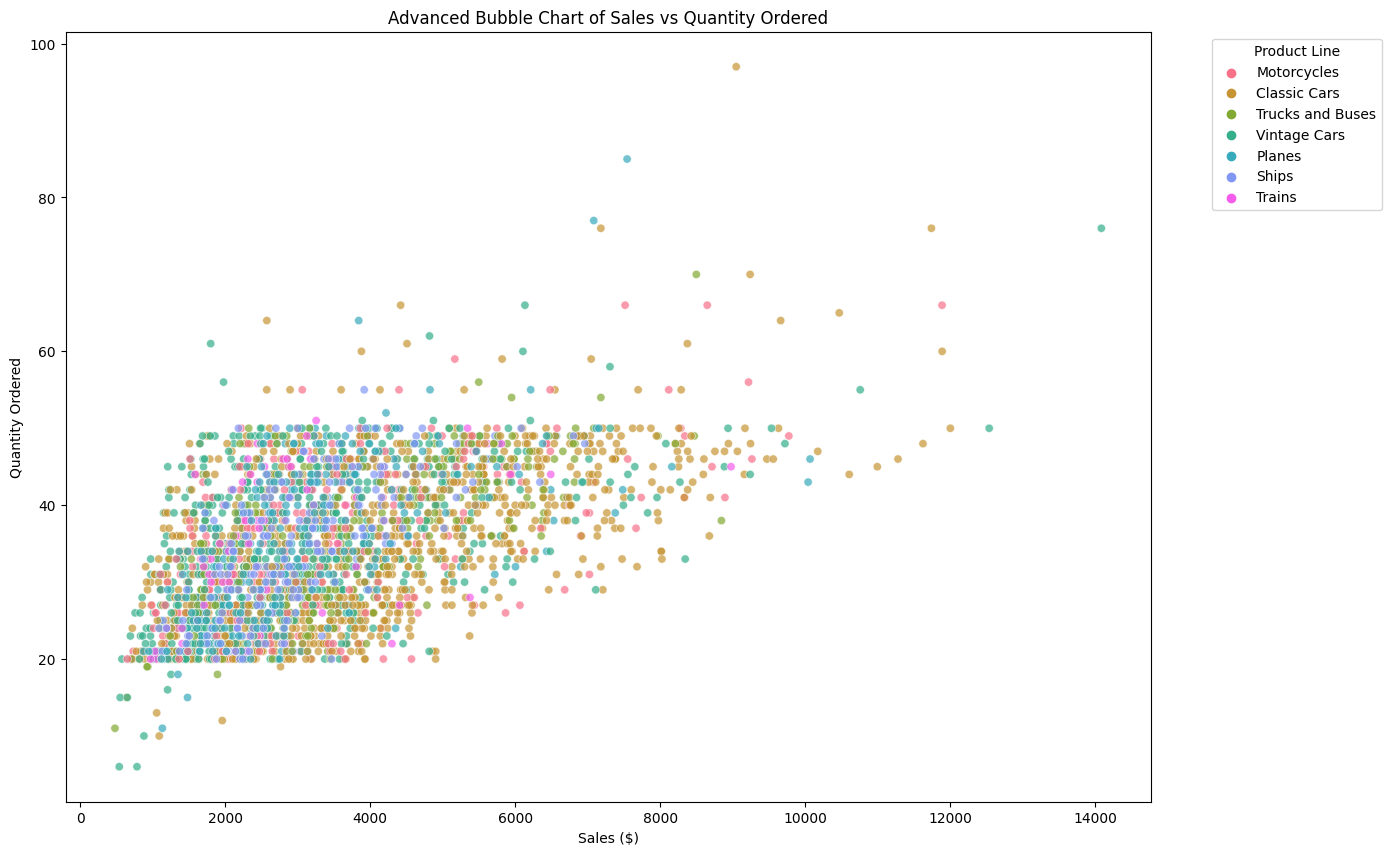

In [39]:
# Bubble chart

# Custom color palette
palette = sns.color_palette("husl", n_colors=data['PRODUCTLINE'].nunique())

# Create a bubble chart
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    data=data, 
    x='SALES', 
    y='QUANTITYORDERED', 
    # size='DEALSIZE', 
    hue='PRODUCTLINE', 
    palette=palette,
    sizes=(50, 500),
    alpha=0.7,  # Adjust transparency
    edgecolor='w',  # Bubble edge color
    linewidth=0.5  # Edge width
)

# Add labels and title
plt.title('Advanced Bubble Chart of Sales vs Quantity Ordered')
plt.xlabel('Sales ($)')
plt.ylabel('Quantity Ordered')

# Add a legend with title and make it more readable
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid and layout adjustments
# plt.grid(True)
# plt.tight_layout()
plt.show()

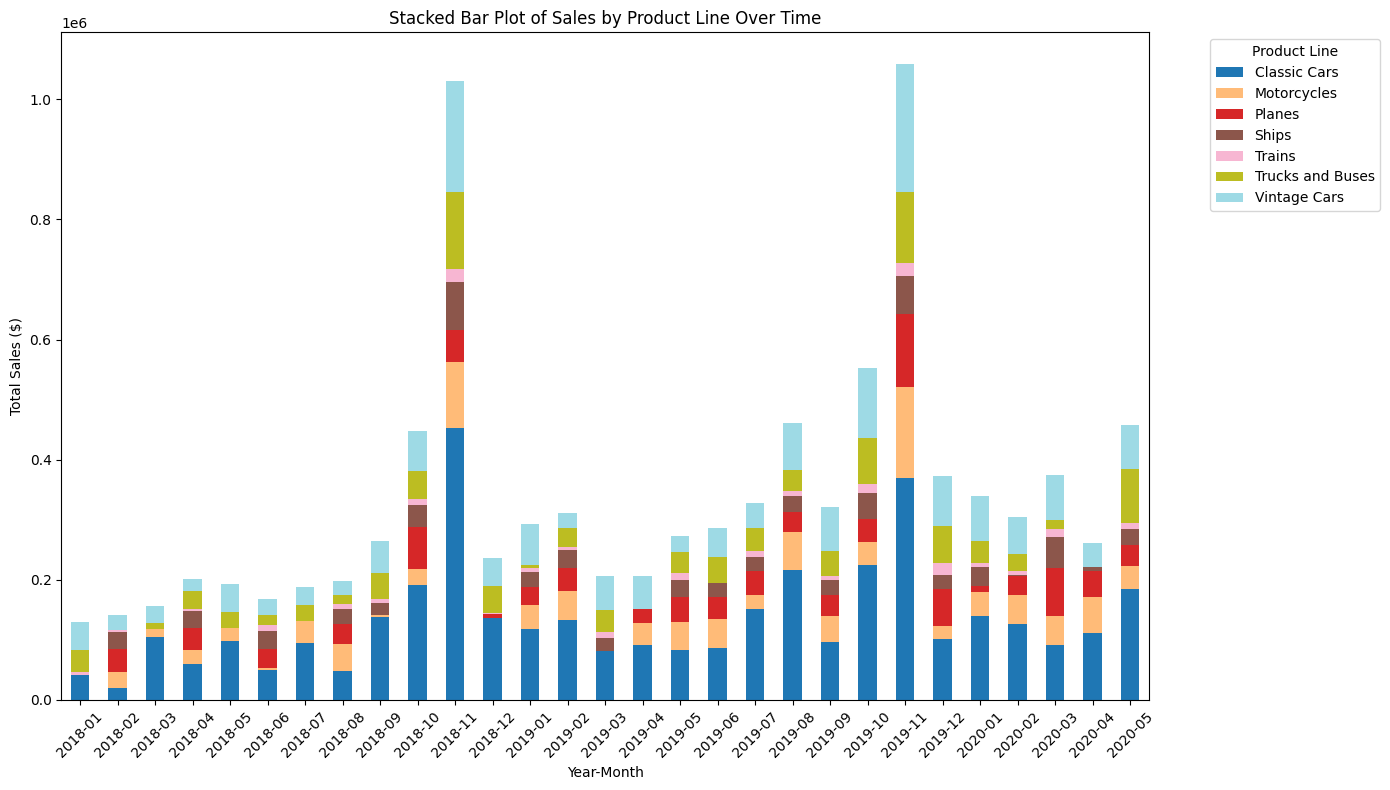

In [40]:
# Stacked Bar Plot

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['YEAR_MONTH'] = data['ORDERDATE'].dt.to_period('M')

# Aggregate sales by year-month and product line
pivot_data = data.pivot_table(
    index='YEAR_MONTH', 
    columns='PRODUCTLINE', 
    values='SALES', 
    aggfunc='sum'
)

# Create a stacked bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title('Stacked Bar Plot of Sales by Product Line Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Grid and layout adjustments
# plt.grid(True)
plt.tight_layout()
plt.show()

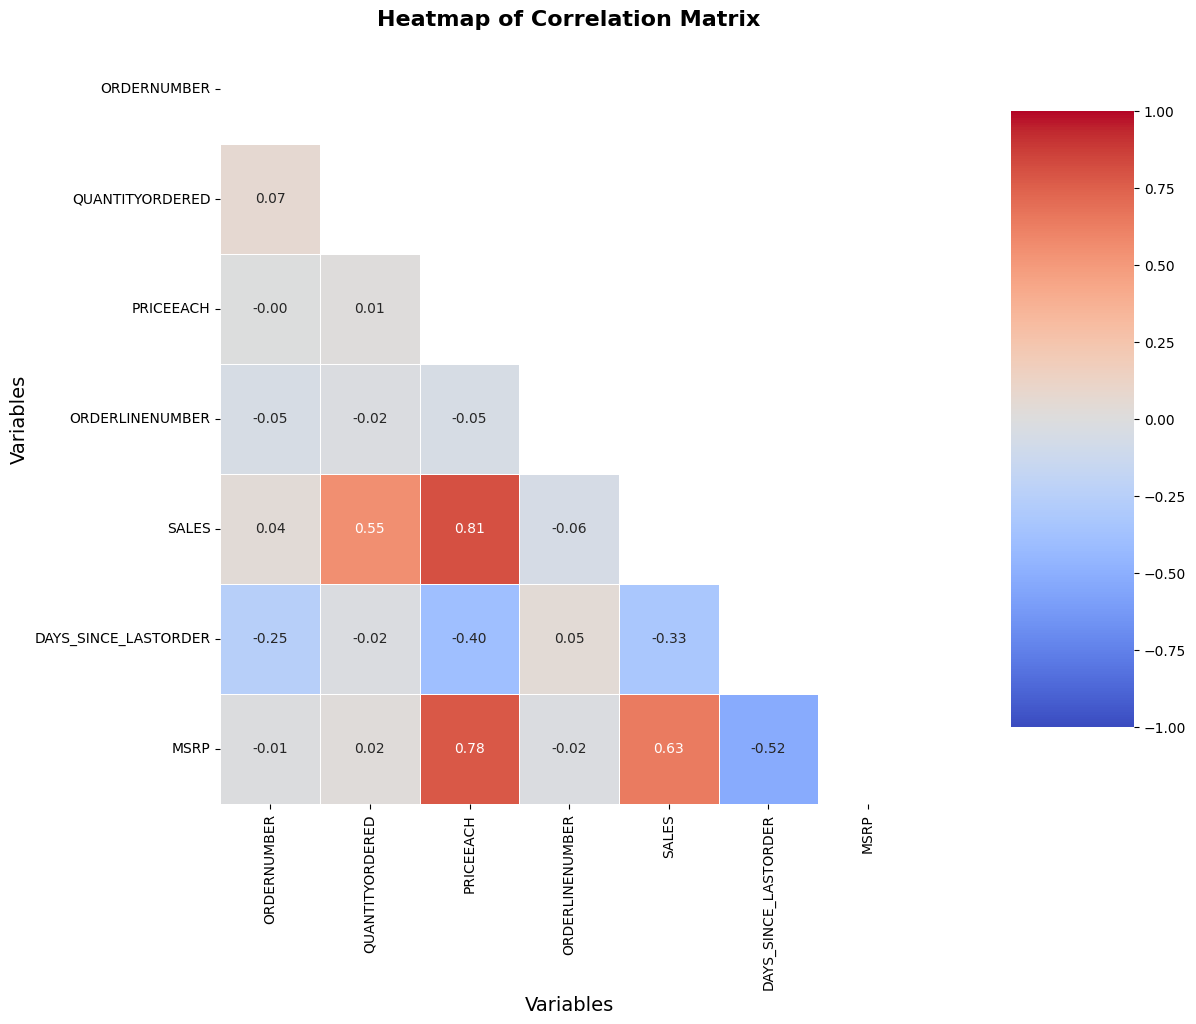

In [41]:
# Heatmap

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))

# Create the heatmap with mask
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            vmin=-1, 
            vmax=1,
            annot_kws={"size": 10},  # Adjust the size of the annotations
            cbar_kws={"shrink": .8, "aspect": 5, "pad": 0.1})  # Customize the color bar

# Add titles and labels with increased font size
plt.title('Heatmap of Correlation Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()

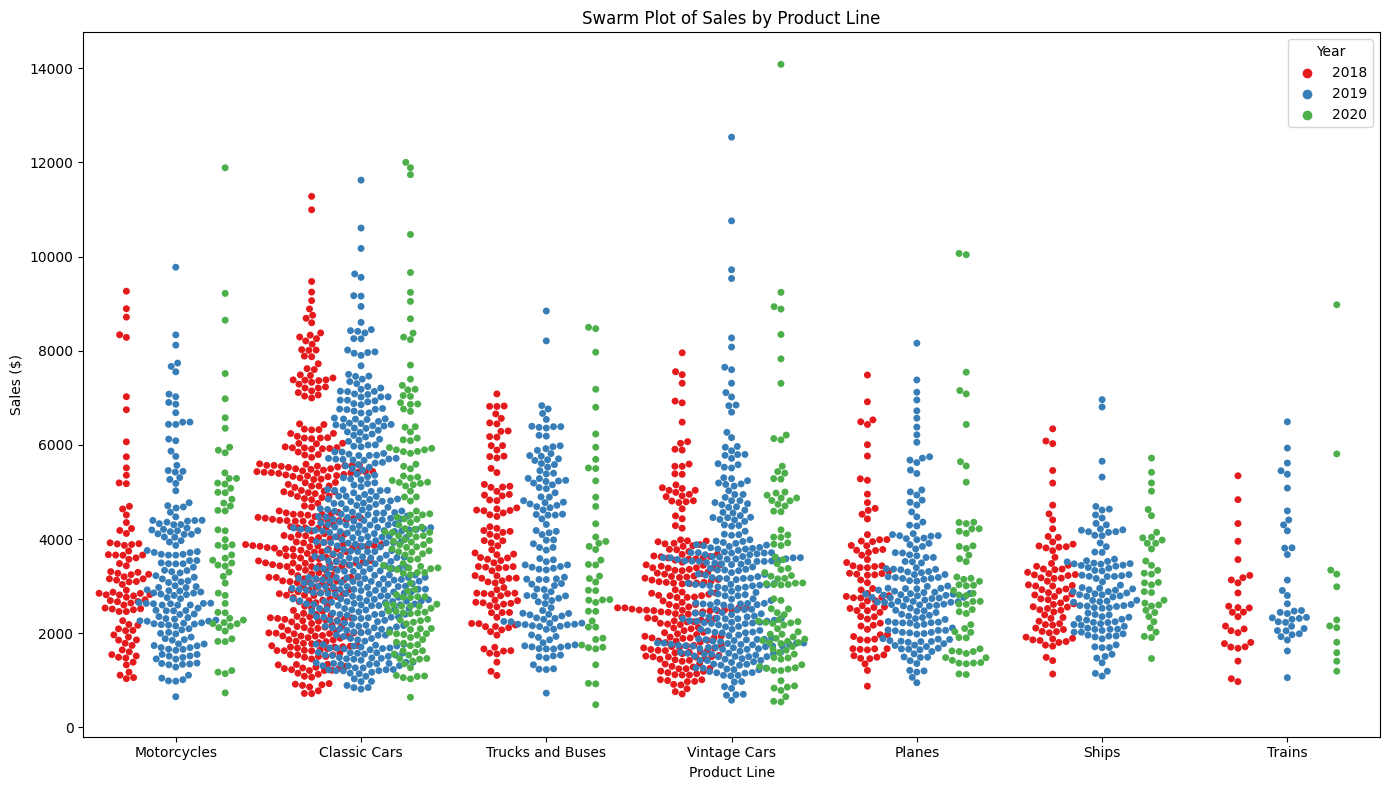

In [42]:
# Swarm plot

data['YEAR'] = data['ORDERDATE'].dt.year

plt.figure(figsize=(14, 8))
sns.swarmplot(data=data, x='PRODUCTLINE', y='SALES', hue='YEAR', palette='Set1', dodge=True)

# Add labels and title
plt.title('Swarm Plot of Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales ($)')

# Add a legend if using hue
plt.legend(title='Year')

# Grid and layout adjustments
# plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

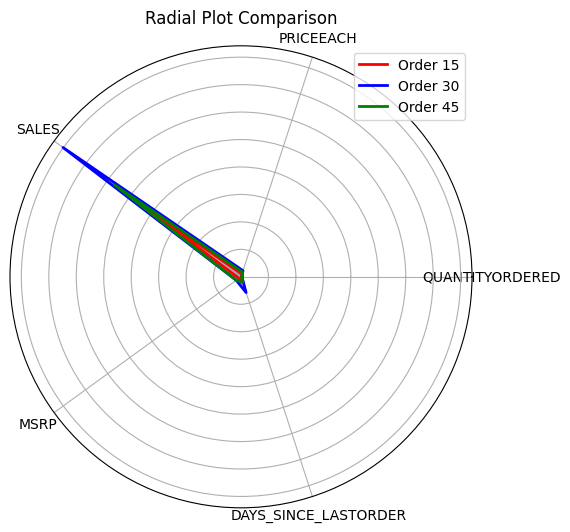

In [43]:
# Radial Plot (Spider Plot)

# Selecting rows to compare
rows = [15, 30, 45]  # Example indices for comparison
colors = ['red', 'blue', 'green']  # Colors for different rows

# Data for plotting
labels = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']
num_vars = len(labels)

# Create a plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row_idx in enumerate(rows):
    example_row = data.loc[row_idx]
    values = [example_row['QUANTITYORDERED'], example_row['PRICEEACH'], example_row['SALES'], example_row['MSRP'], example_row['DAYS_SINCE_LASTORDER']]
    
    # Append the first value to close the plot
    values += values[:1]
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    # Plot
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f'Order {row_idx}')
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add legend
ax.legend(loc='best')

plt.title('Radial Plot Comparison')
plt.show()

In [44]:
# Sunburst Chart

# Create hierarchical data structure for the sunburst chart
sunburst_data = data.groupby(['COUNTRY', 'CITY', 'DEALSIZE']).agg({'SALES': 'sum'}).reset_index()

# Create the sunburst chart
fig = px.sunburst(sunburst_data, 
                  path=['COUNTRY', 'CITY', 'DEALSIZE'], 
                  values='SALES',
                  color='SALES',  # Optional: Color by sales for better visual differentiation
                  color_continuous_scale='Blues',  # Optional: Choose a color scale
                  title='Sunburst Chart of Sales by Hierarchy')

# Customize hover data
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Sales: %{value:,.0f}<extra></extra>'
)

fig.show()

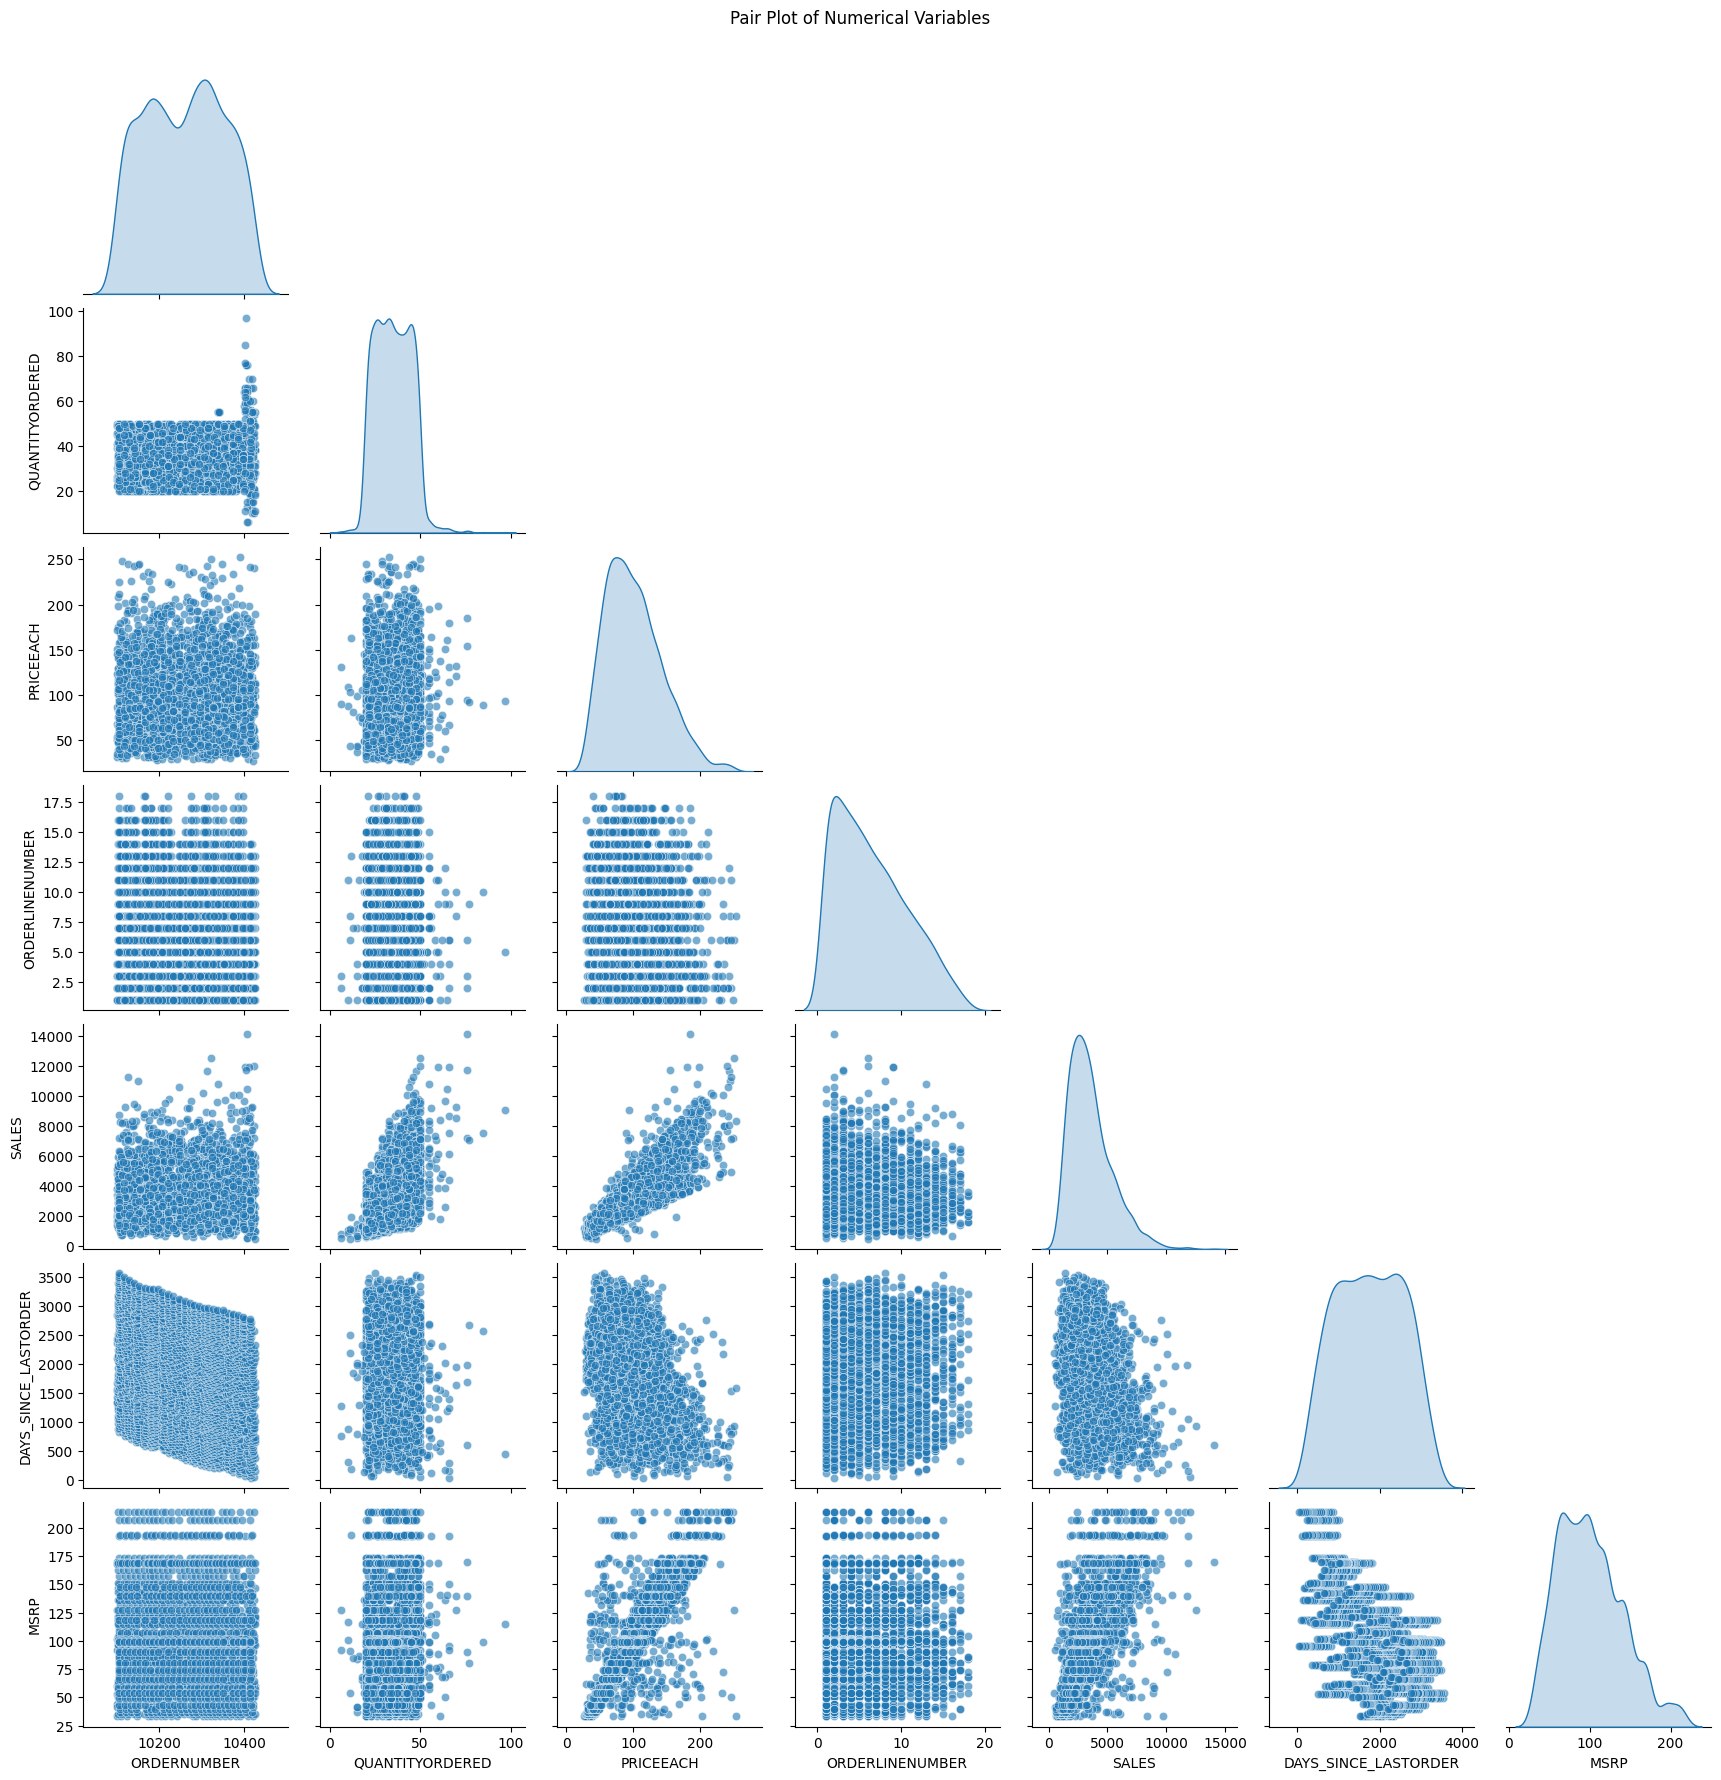

In [45]:
# Pair plot

# Create the pair plot
pair_plot = sns.pairplot(numerical_columns, 
                        diag_kind='kde',  # Use 'hist' for histograms or 'kde' for density plots
                        plot_kws={'alpha':0.6},  # Adjust transparency for better visibility
                        corner=True)  # Remove the upper triangle

# Set the title
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)

plt.show()

In [46]:
# Sankey Diagram

# Convert ORDERDATE to datetime and extract year
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['YEAR'] = data['ORDERDATE'].dt.year

# Filter data for the years 2018, 2019, and 2020
filtered_data = data[data['YEAR'].isin([2018, 2019, 2020])]

# Aggregate total sales by PRODUCTLINE and YEAR
sales_by_productline_year = filtered_data.groupby(['YEAR', 'PRODUCTLINE'])['SALES'].sum().reset_index()

# Prepare data for Sankey diagram
years = sales_by_productline_year['YEAR'].unique()
productlines = sales_by_productline_year['PRODUCTLINE'].unique()

# Create mappings for the nodes
year_to_index = {year: idx for idx, year in enumerate(years)}
productline_to_index = {productline: idx + len(years) for idx, productline in enumerate(productlines)}

# Create lists for Sankey diagram
sources = []
targets = []
values = []

for _, row in sales_by_productline_year.iterrows():
    source = year_to_index[row['YEAR']]
    target = productline_to_index[row['PRODUCTLINE']]
    sources.append(source)
    targets.append(target)
    values.append(row['SALES'])

# Define node labels
node_labels = list(years) + list(productlines)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='rgba(255, 0, 0, 0.5)'  # Optional: Color of the links
    )
)])

# Customize layout
fig.update_layout(
    title_text='Sankey Diagram of Total Sales by Product Line for 2018, 2019, and 2020',
    font_size=10,
    height=600,
    width=800
)

# Show the plot
fig.show()

# Feature engineering

#### Domain knowledge

In [47]:
# Drop the unnecessary columns based on domain knowledge
# data = data.drop(columns=['ORDERNUMBER', 'ORDERLINENUMBER', 'PHONE', 'ADDRESSLINE1', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'])

# Display the first few rows to verify the changes
# print(data.head())

#### VIF

In [48]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    """Calculate VIF for each feature in the DataFrame."""
    df_with_const = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) 
                       for i in range(df_with_const.shape[1])]
    return vif_data[vif_data['Feature'] != 'const']

def remove_high_vif_columns(data, max_vif=6):
    """Iteratively remove columns with VIF above the threshold."""
    while True:
        # Calculate VIF
        vif_data = calculate_vif(data)
        
        # Display the VIF values
        print("\nCurrent VIF values:")
        print(vif_data)
        
        # Check if all VIFs are below the threshold
        if vif_data['VIF'].max() < max_vif:
            print("\nAll VIF values are below the threshold.")
            break
        
        # Remove the column with the highest VIF
        column_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"\nRemoving column: {column_to_remove} with VIF: {vif_data['VIF'].max()}")
        data = data.drop(columns=[column_to_remove])

    return data

# Create a DataFrame with only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check and handle missing and infinite values
print("Missing values in the dataset:")
print(numeric_data.isnull().sum())

print("\nInfinite values in the dataset:")
print((numeric_data == float('inf')).sum())

# Fill or handle missing values
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Replace infinite values with NaN and then handle NaNs
numeric_data.replace([float('inf'), -float('inf')], np.nan, inplace=True)
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Remove columns with high VIF iteratively
cleaned_data = remove_high_vif_columns(numeric_data)

# Display the final DataFrame after removing columns
print("\nFinal numerical data after VIF reduction:")
print(cleaned_data.head())

Missing values in the dataset:
ORDERNUMBER              0
QUANTITYORDERED          0
PRICEEACH                0
ORDERLINENUMBER          0
SALES                    0
DAYS_SINCE_LASTORDER     0
MSRP                     0
ROLLING_AVG             29
dtype: int64

Infinite values in the dataset:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
DAYS_SINCE_LASTORDER    0
MSRP                    0
ROLLING_AVG             0
dtype: int64

Current VIF values:
                Feature        VIF
1           ORDERNUMBER   1.124155
2       QUANTITYORDERED   7.018928
3             PRICEEACH  15.667126
4       ORDERLINENUMBER   1.008941
5                 SALES  20.252091
6  DAYS_SINCE_LASTORDER   1.768444
7                  MSRP   3.640017
8           ROLLING_AVG   2.225270

Removing column: SALES with VIF: 20.252091391272245

Current VIF values:
                Feature       VIF
1           ORDERNUMBER  1.124053
2       

#### RFE

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the path to the dataset
file_path = '/kaggle/input/auto-sales-data/Auto Sales data.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Define columns to be excluded and categorical columns
columns_to_exclude = ['ORDERNUMBER', 'ORDERDATE', 'SALES', 'PHONE', 'ADDRESSLINE1', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
categorical_cols = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE']
numerical_cols = [col for col in data.columns if col not in columns_to_exclude + categorical_cols]

# Drop columns that are not needed
X_rfe = data.drop(columns=columns_to_exclude)
y_rfe = data['SALES']  # Target variable

# Handle missing values separately
# For numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_rfe[numerical_cols] = num_imputer.fit_transform(X_rfe[numerical_cols])

# For categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_rfe[categorical_cols] = cat_imputer.fit_transform(X_rfe[categorical_cols])

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_rfe[col] = le.fit_transform(X_rfe[col])
    label_encoders[col] = le

# Ensure all remaining columns are numeric
non_numeric_cols = X_rfe.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"Non-numeric columns found after encoding: {non_numeric_cols}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=3)  # Adjust n_features_to_select based on your needs

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({
    'Feature': X_rfe.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Display the ranking of features
print("Feature ranking:")
print(feature_ranking)

# Display selected features
selected_features = X_rfe.columns[rfe.support_]
print("\nSelected features:")
print(selected_features)

Feature ranking:
                 Feature  Ranking
0        QUANTITYORDERED        1
1              PRICEEACH        1
11              DEALSIZE        1
4                 STATUS        2
2        ORDERLINENUMBER        3
10               COUNTRY        4
6                   MSRP        5
5            PRODUCTLINE        6
7            PRODUCTCODE        7
9                   CITY        8
3   DAYS_SINCE_LASTORDER        9
8           CUSTOMERNAME       10

Selected features:
Index(['QUANTITYORDERED', 'PRICEEACH', 'DEALSIZE'], dtype='object')


#### RFECV

In [50]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the path to the dataset
file_path = '/kaggle/input/auto-sales-data/Auto Sales data.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Define columns to be excluded and categorical columns
columns_to_exclude = ['ORDERNUMBER', 'ORDERDATE', 'SALES', 'PHONE', 'ADDRESSLINE1', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
categorical_cols = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE']
numerical_cols = [col for col in data.columns if col not in columns_to_exclude + categorical_cols]

# Drop columns that are not needed
X_rfe = data.drop(columns=columns_to_exclude)
y_rfe = data['SALES']  # Target variable

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_rfe[col] = le.fit_transform(X_rfe[col])
    label_encoders[col] = le

# Ensure all remaining columns are numeric
non_numeric_cols = X_rfe.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"Non-numeric columns found after encoding: {non_numeric_cols}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFECV with the model and cross-validation settings
rfecv = RFECV(estimator=model, step=1, cv=5)  # 5-fold cross-validation

# Fit RFECV
rfecv = rfecv.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({
    'Feature': X_rfe.columns,
    'Ranking': rfecv.ranking_
}).sort_values(by='Ranking')

# Display the ranking of features
print("Feature ranking:")
print(feature_ranking)

# Display selected features
selected_features = X_rfe.columns[rfecv.support_]
print("\nSelected features:")
print(selected_features)

# Display the optimal number of features
print("\nOptimal number of features:")
print(rfecv.n_features_)

Feature ranking:
                 Feature  Ranking
0        QUANTITYORDERED        1
1              PRICEEACH        1
11              DEALSIZE        1
4                 STATUS        2
2        ORDERLINENUMBER        3
10               COUNTRY        4
6                   MSRP        5
5            PRODUCTLINE        6
7            PRODUCTCODE        7
9                   CITY        8
3   DAYS_SINCE_LASTORDER        9
8           CUSTOMERNAME       10

Selected features:
Index(['QUANTITYORDERED', 'PRICEEACH', 'DEALSIZE'], dtype='object')

Optimal number of features:
3
